In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit  # to get even classes in the test split
from sklearn.model_selection import train_test_split
from LinearRegression import LinearRegression



In [2]:
iris = load_iris()
# Splitting data into test set with even classes
lr_data = iris.data



In [8]:
# model_1_X = np.vstack((lr_data[:,0], lr_data[:,2])).transpose()
model_1_X = lr_data[:, 0]  # sepal length 
model_1_y = lr_data[:, 2]  # target= petal length



In [4]:
# # Use StratifiedShuffleSplit to select 10% of the data with an even split
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
# 
# for train_index, test_index in sss.split(model_1_X, model_1_y):
#     X_subset, y_subset = model_1_X[test_index], model_1_y[test_index]
# Now, X_subset and y_subset contain the randomly selected 10% of the Iris dataset with an even split of each class
# display(X_subset,y_subset)
model_1_X_train, model_1_X_test, model_1_y_train, model_1_y_test = train_test_split(model_1_X, model_1_y, test_size=0.1,
                                                                                    random_state=42)



In [5]:
reg = LinearRegression()
reg.fit(model_1_X_train, model_1_y_train, regularization=2)
b = reg.bias
m = reg.weights[0]


[0.63939725]


In [6]:
model_1_y_pred = reg.predict(model_1_X_test)
model_1_y_pred
reg.score(model_1_X_test, model_1_y_test)
# y_hat = reg.predict(data)



1.9326501936332798

In [9]:
with open('reg_model_2.pkl', 'wb') as f:
    pickle.dump(reg,f)

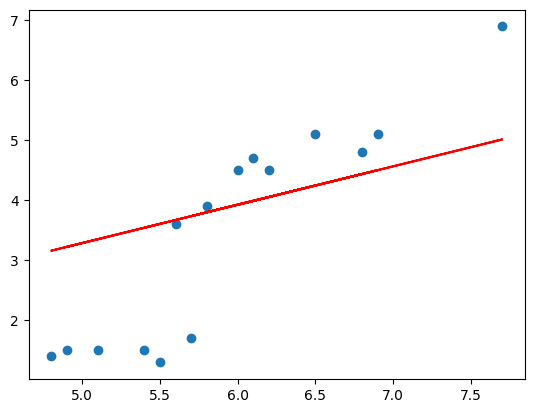

In [7]:
# Visualize the new solution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(model_1_X_test, model_1_y_test)
# ax.scatter(model_1_X_test, y)
ax.plot(model_1_X_test, model_1_y_pred, c='r')